In [1]:
from src.schemas import Adjacency, Landmark, LandmarkType, LandmarkProfile
from src.state import State
from src.model import GNN
import torch
import json

/Users/ignasi/anaconda3/lib/python3.11/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
/Users/ignasi/anaconda3/lib/python3.11/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: dlopen(/Users/ignasi/anaconda3/lib/python3.11/site-packages/torch_scatter/_version_cpu.so, 0x0006): symbol not found in flat namespace '__ZN3c1017RegisterOperatorsD1Ev'
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/Users/ignasi/anaconda3/lib/python3.11/site-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: dlopen(/Users/ignasi/anaconda3/lib/python3.11/site-packages/torch_cluster/_

In [2]:
landmarks_json = json.load(open("data/landmarks.json"))
landmarks = landmarks_json["landmarks"]
s = State(n_landmarks=len(landmarks), edge_probability=0.2)
s.landmarks = [Landmark(**l) for l in landmarks]
s.adjacencies = s.generate_adjacency(s.landmarks)

Generating adjacency matrix: 100%|██████████| 28/28 [00:00<00:00, 58341.04edge/s]


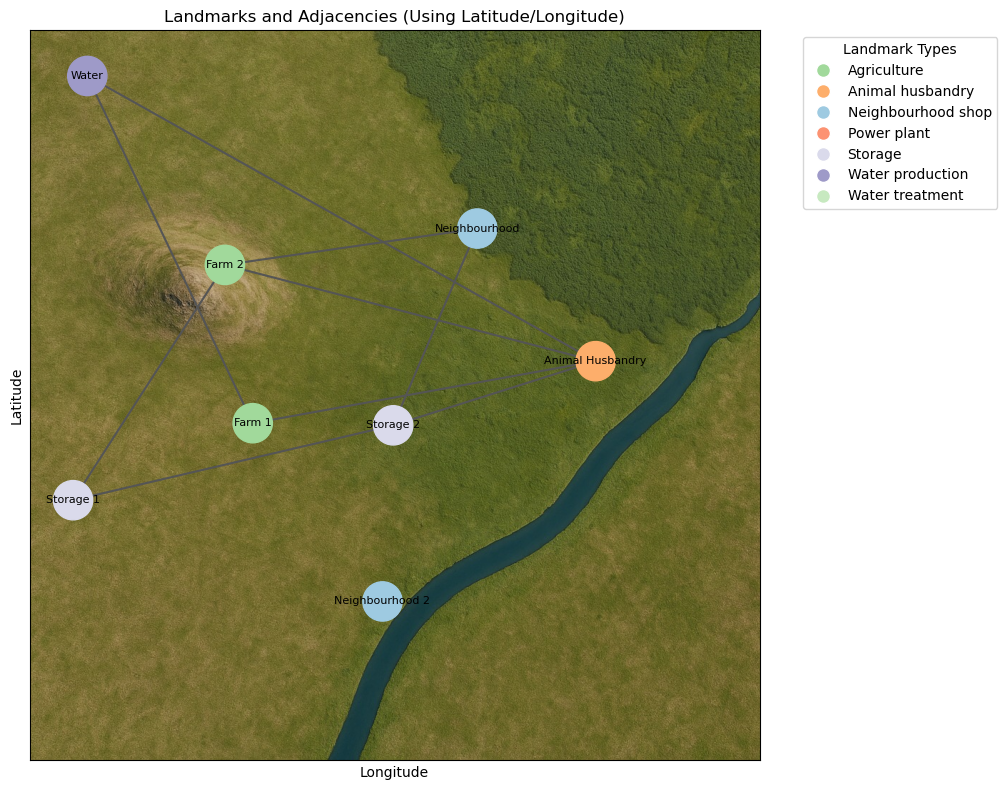

In [3]:
_ = s.plot(background_image_path="assets/map.jpeg")

In [ ]:
model = GNN(in_channels=16, hidden_channels=16, out_channels=8)
model.eval()
with torch.no_grad():
    out = model(s.gnn_data)

node_importance = out.norm(dim=1)
print("Node importance (embedding norms):")
print(node_importance)